# Following period-doubling bifurcations nonrigorously

We solve for superstable period $2^n$-orbits in the first period-doubling cascade of a prototypical family, in order to gain a good estimate of a point on the relevant stable manifold.

In [1]:
FloatType = BigFloat
digits = 50
bits = setprecision(Int(floor(log2(10)*digits+0.5)))

166

In [2]:
function linspace(a::FloatType, b::FloatType, n::Integer)::Array{FloatType, 1}
    @assert n>=2
    ps = [FloatType(k)/FloatType(n-1) for k in 0:n-1]
    xs = [p*b + (1-p)*a for p in ps]
end

linspace(a::Number, b::Number, n::Integer) = linspace(FloatType(a), FloatType(b), n)

linspace (generic function with 2 methods)

In [45]:
function bifurcation_diagram(d, mu_min, mu_max, x_min, x_max, rows, cols, max_iter, keep_iter, samples, alias)
    img::Array{Int, 2} = [1 for j in 1:rows, k in 1:cols]
    mus = linspace(mu_min, mu_max, cols*alias-1)
    for k in 1:cols*alias-1
        col = 1+Int64(floor(k/alias))
        mu = mus[k]
        xs = linspace(x_min, x_max, samples)
        for i in 1:max_iter
            xs = map(x->1-mu*x^d, xs)
        end
        for i in 1:keep_iter
            xs = map(x->1-mu*x^d, xs)
            for x in xs
                if x_min <= x <= x_max
                    row = rows-Int64(floor(rows*(x-x_min)/(x_max-x_min)))
                    if 1 <= row <= rows
                        img[row, col] = 0
                    end
                end
            end
        end
    end
    return img
end

bifurcation_diagram (generic function with 1 method)

In [35]:
#]add PyPlot

In [36]:
#]up PyPlot

In [37]:
using PyPlot
PyPlot.gray()

In [38]:
#using Plots

In [39]:
rows, cols, max_iter, keep_iter, sample, alias = 102, 102, 1000, 128, 64, 2

(102, 102, 1000, 128, 64, 2)

In [46]:
params = d, mu_min, mu_max, x_min, x_max = 4, 0.0, 2.0, -1.0, 1.0
@time img = bifurcation_diagram(d, mu_min, mu_max, x_min, x_max, rows, cols, max_iter, keep_iter, sample, alias);

 14.827408 seconds (125.43 M allocations: 5.368 GiB, 4.62% gc time)


In [27]:
using Serialization
#serialize("bifurcation_pow4_2.jls", [params, img1])
(params, img) = deserialize("bifurcation_pow4_1.jls")
d, mu_min, mu_max, x_min, x_max = params

(4, 0.0, 2.0, -1.0, 1.0)

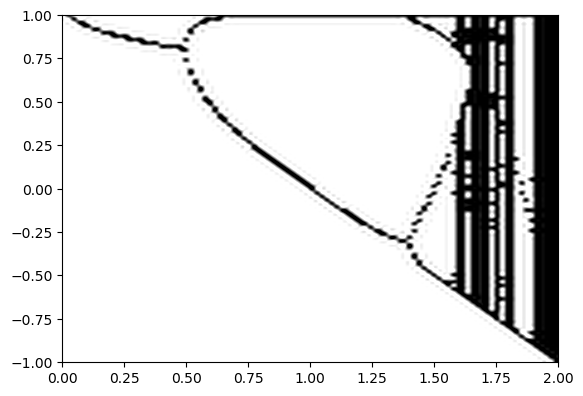

PyObject <matplotlib.image.AxesImage object at 0x7f000a39db00>

In [47]:
imshow(img, interpolation="lanczos", extent=(mu_min, mu_max, x_min, x_max), aspect=0.7*(mu_max-mu_min)/(x_max-x_min))

In [36]:
#d, mu_min, mu_max, x_min, x_max = 4, 1.55, 1.596, -1.0, 1.0
#@time img2 = bifurcation_diagram(d, mu_min, mu_max, x_min, x_max, rows, cols, max_iter, keep_iter, sample, alias);

In [37]:
#imshow(img2, interpolation="lanczos", extent=(mu_min, mu_max, x_min, x_max), aspect=0.7*(mu_max-mu_min)/(x_max-x_min))

In [48]:
function find_superstable_parameter(d::Integer, a::FloatType, b::FloatType, p::Integer, n::Integer)
    function err(mu)
        x::FloatType = FloatType(0)
        h::FloatType = FloatType(0)
        for k in 1:p
            x = 1 - mu*x^d
            if k == p/2
                h = x
            end
        end
        x, h
    end
    fa, ha = err(a)
    fb, hb = err(b)
    c = a - fa*(a-b)/(fa-fb) #(a + b)/2
    fc, hc = err(c)
    for k in 1:n
        if c == a || c == b
            println("early: converged after $k steps")
            return c, fc, hc
        end
        if fa*fc <= 0
            b, fb = c, fc
        elseif fc*fb <= 0
            a, fa = c, fc
        else
            @assert false
        end
        c = a - fa*(a-b)/(fa-fb) #(a + b)/2
        fc, hc = err(c)
    end
    @assert abs(hc) > abs(fc)
    c, fc, hc
end

find_superstable_parameter (generic function with 1 method)

In [49]:
a = [FloatType(0) for j in 1:100];
b = [FloatType(0) for j in 1:100];
s = [FloatType(0) for j in 1:100];
e = [FloatType(0) for j in 1:100];
d = [FloatType(0) for j in 1:100];
h = [FloatType(0) for j in 1:100];
alphas = [FloatType(0) for j in 1:100];

In [50]:
a[1], b[1] = FloatType(0.9), FloatType(1.0)
a[2], b[2] = FloatType(1.4), FloatType(1.55)
a[3], b[3] = FloatType(1.57), FloatType(1.59)

(1.57000000000000006217248937900876626372337341308594, 1.59000000000000007993605777301127091050148010253906)

In [51]:
n = bits

166

In [52]:
s[1], e[1], h[1] = find_superstable_parameter(4, a[1], b[1], 2^1, n)

early: converged after 1 steps


(1.0, 0.0, 1.0)

In [53]:
s[2], e[2], h[2] = find_superstable_parameter(4, a[2], b[2], 2^2, n)

early: converged after 56 steps


(1.50393440785455922191062361159474926539380484373249, -2.13821176807375651691242917372118550305215750408404e-50, -0.503934407854559221910623611594749265393804843732491)

In [54]:
s[3], e[3], h[3] = find_superstable_parameter(4, a[3], b[3], 2^3, n)

early: converged after 63 steps


(1.58225304517237897214918409959260127952404787973164, 1.81748000286269303937556479766300767759433387847143e-49, 0.29107703232904741494532036269893180298970384794581)

In [55]:
d[1] = (s[2]-s[1])/(s[3]-s[2])

6.43441235844765650373719452344959993478819164155267

In [56]:
start, stop = 4, 6

(4, 6)

In [84]:
using Serialization
(a, b, s, d, e, h, alphas) = deserialize("superstables_pow4_32.jls")
start, stop = 33, 33

(33, 33)

In [ ]:
for k in start:stop
    
    # predict width and position of interval
    width = (b[k-1]-a[k-1])/d[k-3]
    predicted = s[k-1] + (s[k-1]-s[k-2])/d[k-3]
    
    # solve for superstable parameter and halway orbit point
    a[k], b[k] = predicted-width/2, predicted+width/2
    s[k], e[k], h[k] = find_superstable_parameter(4, a[k], b[k], 2^k, bits)
    
    # superstable parameter values form a strictly increasing sequence
    @assert s[k-1] < s[k]
    
    # the orbits should be getting smaller at the halfway point
    @assert abs(h[k]) < abs(h[k-1])
    
    # closest approaches oscillate about the origin
    @assert h[k]*h[k-1] < 0
    
    # update estimates for delta and alpha
    d[k-2] = (s[k-1]-s[k-2])/(s[k]-s[k-1])
    alphas[k-2] = (h[k-1]-h[k-2])/(h[k]-h[k-1])
    
    # report on progress
    println("$k\n$(s[k])\n$(e[k])\n$(h[k])\n$(d[k-2])\n$(alphas[k-2])")
end

In [83]:
serialize("superstables_pow4_$(stop).jls", (a, b, s, d, e, h, alphas))

In [85]:
names = ("Parameter", "Error", "Halfway", "Delta", "Alpha")
for (data, name) in zip((s, e, h, d, alphas), names)
    println(name)
    for k in 2:stop
        println("$(k) $(data[k])")
    end
    println()
end

Parameter
2 1.50393440785455922191062361159474926539380484373249
3 1.58225304517237897214918409959260127952404787973164
4 1.59316486333511718749684856476281140358796810779423
5 1.59466304624830278287846208071800487446413580457908
6 1.59486864741155577699320276243844022931544732618248
7 1.59489686637225007309667462933007644860143196634699
8 1.59490073989691468352317902020378984232084695217683
9 1.59490127162270653630814263450188629164894387386937
10 1.59490134461459431462826407121272541690364188415091
11 1.59490135463448676465410202154879139711014268194645
12 1.59490135600995957885066635487065253096879187740039
13 1.59490135619877658300217399166837026874571855528007
14 1.59490135622469629884131033480989510210785175483225
15 1.59490135622825440893241718354931331431985491055436
16 1.59490135622874284590459905531219678376720543030294
17 1.59490135622880989573449513925982904110931129516143
18 1.59490135622881909995110501200277302502286039269724
19 1.59490135622882036345324289808664514260701